In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

**<font size='6' color='red'>ch2. 한글 형태소 분석</font>**
# 1. 자연어 처리
- 자연어 : 일상적인 언어
- 자연어 처리 분야 :
    * 자연어 이해 : 형대소분석 -> postagging -> 의미분석, 시각화
    * 자연어 생성 : RNN, LSTM, GRU, ..., encoder-decoder알고리즘 -> 트렌스포머알고리즘
- 활용분야 : 트랜스 분석, 탐색적분석, 맞춤법검사, 번역기, 챗봇

# 2. 자연어 이해 처리 절차
- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 품사태깅(pos tagging)
- 제약조건(불용어 처리) : 규칙 확인
- 분석 : 시각화(워드클라우드), 연관분석, RNN, LSTM, GRU, ...

# 3. 한글 형태소 분석 엔진(Konlpy,...)
- 공통기능 : morphs(형태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사 태그)

- konlpy (pip install konlpy : jpype1 라이브러리를 의존)
    * HanNanum : 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, Path설정)
    * Kkma     : 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, Path설정)
    * Komoran  : 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, Path설정)
    * Okt      
- Mecab (pip install python-mecab-ko)
    * Mecab : C++로 만든 형태소 분석기.저사양환경에서 사용 가능. 다국어 바인딩 지원

In [2]:
import os
os.environ.get('JAVA_HOME')

'C:\\Program Files\\Java\\jdk-17'

In [3]:
text = '''아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다'''

## 3.1 HanNanum 

In [4]:
from konlpy.tag import Hannanum
hannanum = Hannanum(jvmpath=None,
                   max_heap_size=512,  # 기본값:1024, '10m', '1g', 최대사이즈 4g
                   )
hannanum.analyze(text)  # ntag=69로 형태소분석 후보

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용되눈', 'ncn')], [('사용되눈', 'nqq')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]]]

- 구글에서 konlpy.docs 검색 후 : https://konlpy.org/
- api 메뉴 -> "Comparison between POS tagging classes"클릭 -> Korean POS tags comparison chart클릭

In [28]:
# 형태소 분석 : morphs
print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [29]:
# 명사만 추출 : nouns
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [30]:
# 품사태깅 : pos
print(hannanum.pos(text, ntags=9))  # 품사갯수 기본값 ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E')]


In [31]:
print(hannanum.pos(text, ntags=22))

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF')]


In [25]:
# 퀴즈 1. text에서 형용사(PA)만 추출
# text_PA = []
# for tag in text:
#     if tag[1] == 'PA':
#         text_PA.append(tag[1])
# text_PA
tagged_text = hannanum.pos(text, ntags=22)
words=[token for token, tag in tagged_text if tag=='PA']
# for token, tag in tagged_text:
#     if tag=='PA':
#         words.append(token)
words

['아름답', '많']

In [27]:
# 퀴즈 2. text에서 명사만 추출
print([token for token, tag in tagged_text if tag.find('N') != -1])
print([(token, tag) for token, tag in tagged_text if tag in('NC','NQ','NB','NN','NP')])
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13', '번', '사용', '언어']
[('복잡', 'NC'), ('한국어', 'NC'), ('전세계', 'NC'), ('13', 'NN'), ('번', 'NB'), ('사용', 'NC'), ('언어', 'NC')]
['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [26]:
# 퀴즈 3. text에서 보통 명사만 추출
[token for token, tag in tagged_text if tag=='NC']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.2 Kkma

In [4]:
from konlpy.tag import Kkma
kkma = Kkma(jvmpath=None,
            max_heap_size=1024) # "4m", "4g"
# 형태소 분석
print(kkma.morphs(text))  # 형태소 분석

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [5]:
# 명사추출
print(kkma.nouns(text)) 

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [6]:
# 품사 태깅
print(kkma.pos(text)) # ntags 지정 불가(무조건 56으로)

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [10]:
# 명사 추출
tagged_text = kkma.pos(text)
print([word for word, tag in tagged_text if tag in('NNG','NNP','NNB','NNM')])
print(kkma.nouns(text)) 

['복잡', '한국어', '전세계', '번째', '사용', '언어']
['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [11]:
# 보통명사(NNG)+고유명사(NNP)
print([word for word, tag in tagged_text if tag in ('NNG','NNP')])

['복잡', '한국어', '전세계', '사용', '언어']


## 3.3 Komoran

In [14]:
from konlpy.tag import Komoran
komoran = Komoran()
# 형태소 분석
print(komoran.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [15]:
# 명사 추출
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [16]:
# 품사 태깅
print(komoran.pos(text)) # ntags 조정 불가

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [17]:
# 일반명사(NNG), 고유병사(NNP)만 추출
print([token for token, tag in komoran.pos(text) if tag in ('NNG','NNP')])

['한국어', '전', '세계', '사용', '언어']


## 3.4 Twitter(Okt; Open Korean Text)
- konlpy v0.4.5 부터 twitter -> okt로 바뀜

In [18]:
import konlpy
konlpy.__version__

'0.6.0'

In [31]:
%%time
from konlpy.tag import Okt, Twitter
# okt = Twitter()
okt = Okt()
# print('구 추출 : ', okt.phrases(text))
print('형태소 추출 : ', okt.morphs(text))
print('명사 추출 : ', okt.nouns(text))
print('품사 태깅 : ', okt.pos(text))
tagged_text = okt.pos(text)
print('품사태깅을 이용한 명사 추출 : ', [token for token, tag in tagged_text if tag=='Noun'])

형태소 추출 :  ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '13', '번', '째', '로', '많이', '사용', '되는', '언어', '입니다']
명사 추출 :  ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅 :  [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective')]
품사태깅을 이용한 명사 추출 :  ['다소', '한국어', '전세계', '번', '사용', '언어']
CPU times: total: 78.1 ms
Wall time: 29 ms


## 3.5 MeCab
- pip install python-mecab-ko

In [29]:
%%time
from mecab import MeCab
mecab = MeCab()  # 힙메모리 사이즈 지정이 안 됨
print('형태소 추출 : ', mecab.morphs(text))
print('명사 추출 : ', mecab.nouns(text))
tagged_text = mecab.pos(text)
print('품사 태깅을 이용한 명사 추출 : ', [token for token, tag in tagged_text if tag in ('NNG','NNP','NNB','NNBC','NP','NR')])
print('품사 태깅 : ', tagged_text)

형태소 추출 :  ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다']
명사 추출 :  ['한국어', '세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 :  ['한국어', '세계', '번', '사용', '언어']
품사 태깅 :  [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EC')]
CPU times: total: 0 ns
Wall time: 4.99 ms


# 4. 말뭉치

In [34]:
# 영어 말뭉치
import nltk
emma = nltk.corpus.gutenberg.raw("austen-emma.txt")

In [37]:
# 한글 말뭉치
%pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [43]:
# 한글 말뭉치
from konlpy.corpus import kolaw
# data = kolaw.open('constitution.txt').readlines()  # 한줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print('글자수 : ', len(data))
print('%r' % data[:100])

글자수 :  18884
'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'


# 5. 워드 클라우드
- pip install wordcloud

In [57]:
# 말뭉치에서 단어 추출(특수 문자 제외)
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
ret = RegexpTokenizer('[\w]{2,}')
words = ret.tokenize(emma)
# 명사(고유명사 제외)만 추출
emma_tags = pos_tag(words)
nous_list = [ token for token, tag in emma_tags if tag in ('NN','NNS')]
print('추출된 명사 갯수 : ',len(nous_list), '\t단어 종류수 : ',len(set(nous_list)))
print('noun_list : ',nous_list[:10])
emma_noun = ' '.join(nous_list)
print('워드 클라우드에 필요한 내용 : ', emma_noun[:100])

추출된 명사 갯수 :  22362 	단어 종류수 :  3498
noun_list :  ['Emma', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world', 'daughters', 'indulgent']
워드 클라우드에 필요한 내용 :  Emma clever home disposition blessings existence years world daughters indulgent father consequence 


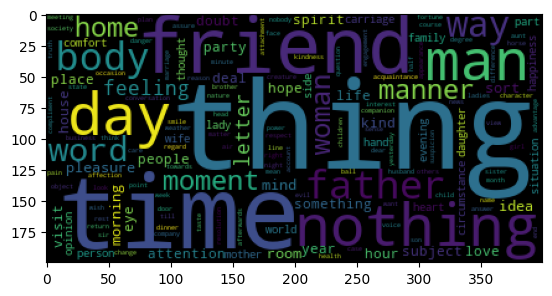

In [61]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordc = WordCloud()
wordc.generate(emma_noun)
plt.imshow(wordc)
plt.show()

- 컬러맵
    - https://matplotlib.org/stable/users/explain/colors/colormaps.html

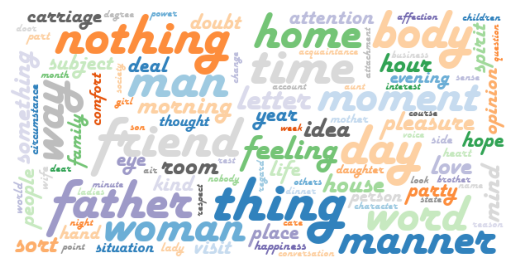

In [120]:
wordcloud = WordCloud(font_path='C:\Windows\Fonts\HARLOWSI',
                    width=600, # 생성될 이미지 가로(픽셀)
                    height=300,
                    background_color='white', # 배경색
                    max_words=300,  # 표시될 단어의 최대갯수
                    relative_scaling=0.2,  # 단어 빈도에 따른 크기 차이 조정
                    colormap= 'tab20c', # 글씨 컬러맵
                    max_font_size=80,  # 최대 폰트 사이즈
                    min_font_size=10,  # 최소 폰트 사이즈
                    )
wordcloud.generate(emma_noun),
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [85]:
# 한글 말뭉치 data로 워드 클라우드 시각화
from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from mecab      import MeCab
analyzer = MeCab()
noun_list = analyzer.nouns(data)
noun_list = [word for word, tag in analyzer.pos(data) if tag in ('NNG','NNP')]
print(len(noun_list))
# print(noun_list2[:20])
data_noun = ' '.join(noun_list)
data_noun[:100]

3284


'대한민국 헌법 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주 개혁 평화 통일 사명 입각 정의 인도 동포 애 민족 단결 사회 폐습 불의 타'

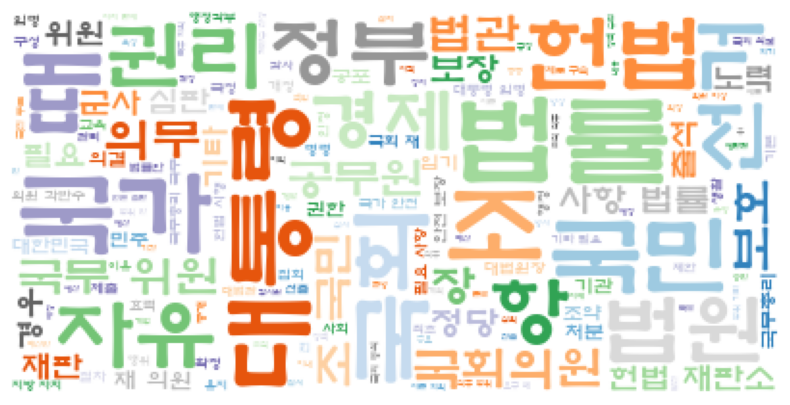

In [106]:
wordcloud = WordCloud(
                    font_path='C:\Windows\Fonts\HMFMOLD',
#                     width=600, # 생성될 이미지 가로(픽셀)
#                     height=300,
                    background_color='white', # 배경색
                    max_words=300,  # 표시될 단어의 최대갯수
                    relative_scaling=0.2,  # 단어 빈도에 따른 크기 차이 조정
                    colormap= 'tab20c', # 글씨 컬러맵
#                     max_font_size=80,  # 최대 폰트 사이즈
#                     min_font_size=10,  # 최소 폰트 사이즈
#                     random_state=3, # 위치 고정값
                    )
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [112]:
# 불용어 처리 (불용어지정 + 불용어사전)
from wordcloud import STOPWORDS
#불용어 = STOPWORDS | {'대통령','법률'}  # | : 집합합연산자
불용어 = {'대통령','법률','조'}
#불용어 = set(['대통령','법률','조'])
불용어

{'대통령', '법률', '조'}

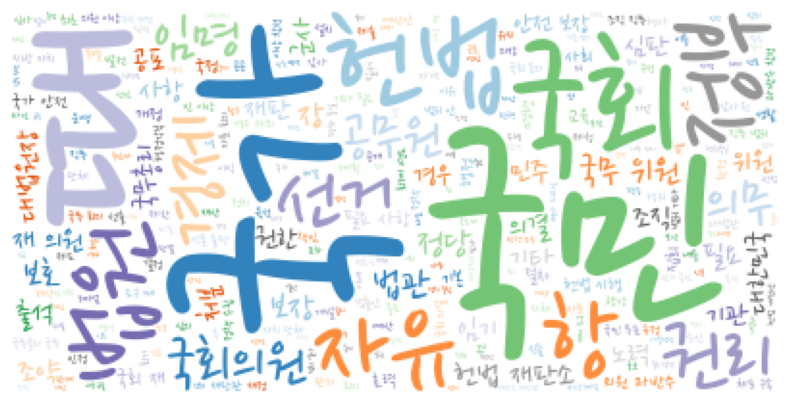

In [118]:
wordcloud = WordCloud(
                    font_path='data/NanumPenScript-Regular.ttf',
#                     width=600, # 생성될 이미지 가로(픽셀)
#                     height=300,
                    background_color='white', # 배경색
                    max_words=300,  # 표시될 단어의 최대갯수
                    relative_scaling=0.2,  # 단어 빈도에 따른 크기 차이 조정
                    colormap= 'tab20c', # 글씨 컬러맵
#                     max_font_size=80,  # 최대 폰트 사이즈
#                     min_font_size=10,  # 최소 폰트 사이즈
#                     random_state=3, # 위치 고정값
                    stopwords=불용어,
                    mask=
                    )
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(468, 720, 3)

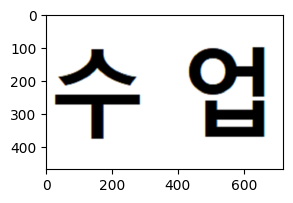

In [131]:
# 마스킹 : 워드클라우드를 지정된 마스크 이미지에 맞도록 설정
# 이미지를 넘파이 배열로 방법1
from PIL import Image
import numpy as np
img = Image.open('data/test.png')
mask = np.array(img)
plt.figure(figsize=(4,2))
plt.imshow(mask)
mask.shape

(468, 720, 3)

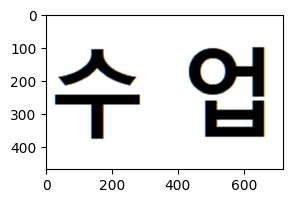

In [129]:
# 이미지를 넘파이 배열로 방법2
import cv2
# %pip install opencv-contrib-python
mask = cv2.imread('data/test.png', 
                  #cv2.IMREAD_GRAYSCALE
                 )
plt.figure(figsize=(4,2))
plt.imshow(mask)
mask.shape

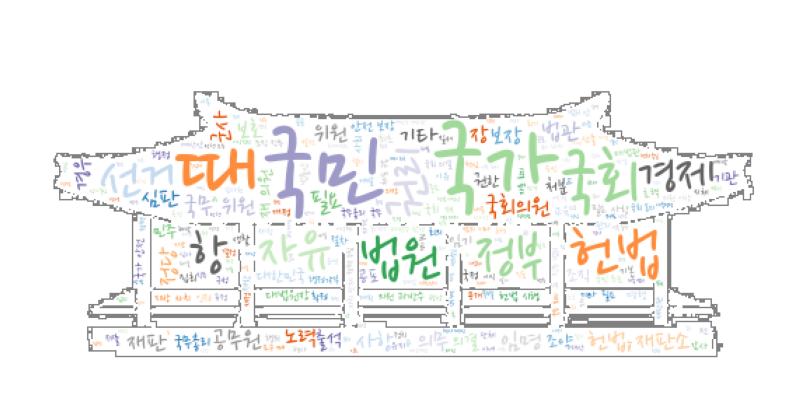

In [165]:
wordcloud = WordCloud(
                    font_path='data/NanumPenScript-Regular.ttf',
#                     width=600, # 생성될 이미지 가로(픽셀)
#                     height=300,
                    background_color='white', # 배경색
                    max_words=300,  # 표시될 단어의 최대갯수
                    relative_scaling=0.2,  # 단어 빈도에 따른 크기 차이 조정
                    colormap= 'tab20c', # 글씨 컬러맵
#                     max_font_size=80,  # 최대 폰트 사이즈
#                     min_font_size=10,  # 최소 폰트 사이즈
#                     random_state=3, # 위치 고정값
                    stopwords=불용어,
                    mask=mask,
                    contour_color='gray',
                    contour_width=1
                    )
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

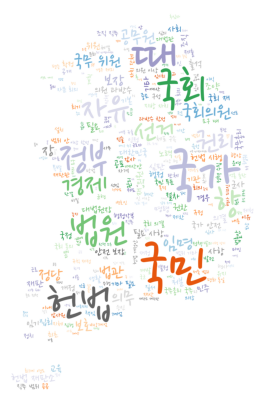

In [139]:
mask2 = cv2.imread('data/south_korea.png', 
                  #cv2.IMREAD_GRAYSCALE
                 )
mask2.shape
wordcloud = WordCloud(
                    font_path='data/NanumPenScript-Regular.ttf',
#                     width=600, # 생성될 이미지 가로(픽셀)
#                     height=300,
                    background_color='white', # 배경색
                    max_words=300,  # 표시될 단어의 최대갯수
                    relative_scaling=0.2,  # 단어 빈도에 따른 크기 차이 조정
                    colormap= 'tab20c', # 글씨 컬러맵
#                     max_font_size=80,  # 최대 폰트 사이즈
#                     min_font_size=10,  # 최소 폰트 사이즈
#                     random_state=3, # 위치 고정값
                    stopwords=불용어,
                    mask=mask2
                    )
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

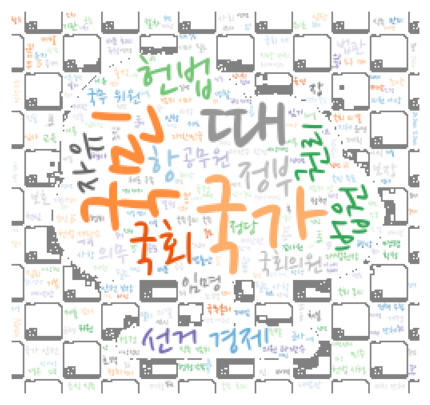

In [166]:
mask3 = cv2.imread('data/test2.jpg')
mask3.shape
wordcloud = WordCloud(
                    font_path='data/NanumPenScript-Regular.ttf',
#                     width=600, # 생성될 이미지 가로(픽셀)
#                     height=300,
                    background_color='white', # 배경색
                    max_words=300,  # 표시될 단어의 최대갯수
                    relative_scaling=0.2,  # 단어 빈도에 따른 크기 차이 조정
                    colormap= 'tab20c', # 글씨 컬러맵
#                     max_font_size=80,  # 최대 폰트 사이즈
#                     min_font_size=10,  # 최소 폰트 사이즈
#                     random_state=3, # 위치 고정값
                    stopwords=불용어,
                    mask=mask3,
                        contour_color='gray',
                    contour_width=1
                    )
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

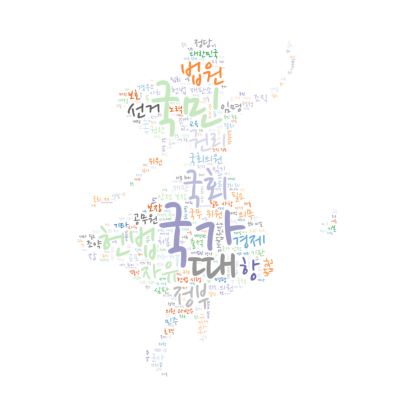

In [144]:
mask4 = cv2.imread('data/test3.png')
mask4.shape
wordcloud = WordCloud(
                    font_path='data/NanumPenScript-Regular.ttf',
#                     width=600, # 생성될 이미지 가로(픽셀)
#                     height=300,
                    background_color='white', # 배경색
                    max_words=300,  # 표시될 단어의 최대갯수
                    relative_scaling=0.2,  # 단어 빈도에 따른 크기 차이 조정
                    colormap= 'tab20c', # 글씨 컬러맵
#                     max_font_size=80,  # 최대 폰트 사이즈
#                     min_font_size=10,  # 최소 폰트 사이즈
#                     random_state=3, # 위치 고정값
                    stopwords=불용어,
                    mask=mask4
                    )
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(900, 900)


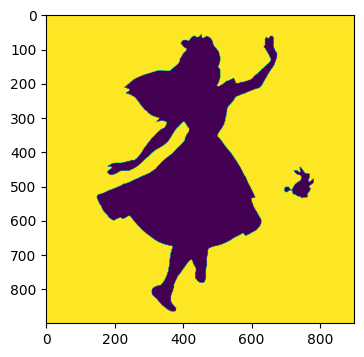

In [161]:
# mask5 = cv2.imread('data/south_korea.png')
img = Image.open('data/test3.png')
mask5 = np.array(img)
plt.figure(figsize=(8,4))
plt.imshow(mask5)
print(mask5.shape)

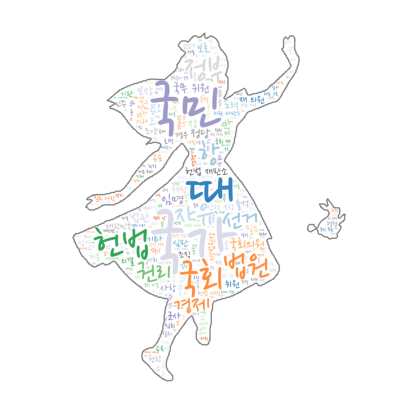

In [162]:
wordcloud = WordCloud(
                    font_path='data/NanumPenScript-Regular.ttf',
#                     width=600, # 생성될 이미지 가로(픽셀)
#                     height=300,
                    background_color='white', # 배경색
                    max_words=300,  # 표시될 단어의 최대갯수
                    relative_scaling=0.2,  # 단어 빈도에 따른 크기 차이 조정
                    colormap= 'tab20c', # 글씨 컬러맵
#                     max_font_size=80,  # 최대 폰트 사이즈
#                     min_font_size=10,  # 최소 폰트 사이즈
#                     random_state=3, # 위치 고정값
                    stopwords=불용어,
                    mask=mask5,
                        contour_color='gray',
                    contour_width=2
                    )
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(1124, 720, 4)


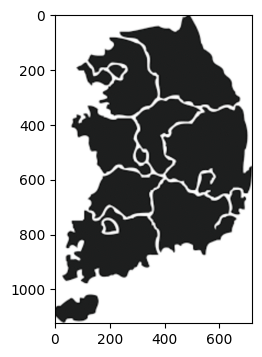

In [168]:
# convert('RGB') : 1채널 이미지파일 -> 3채널
# convert('RGBA') : 1채널 이미지파일 -> 4채널('RGB+투명도채널')
img = Image.open('data/south_korea.png').convert('RGBA')
mask5 = np.array(img)
plt.figure(figsize=(8,4))
plt.imshow(mask5)
print(mask5.shape)

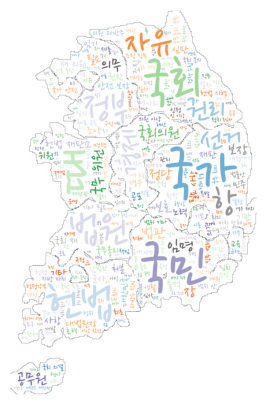

In [169]:
wordcloud = WordCloud(
                    font_path='data/NanumPenScript-Regular.ttf',
#                     width=600, # 생성될 이미지 가로(픽셀)
#                     height=300,
                    background_color='white', # 배경색
                    max_words=300,  # 표시될 단어의 최대갯수
                    relative_scaling=0.2,  # 단어 빈도에 따른 크기 차이 조정
                    colormap= 'tab20c', # 글씨 컬러맵
#                     max_font_size=80,  # 최대 폰트 사이즈
#                     min_font_size=10,  # 최소 폰트 사이즈
#                     random_state=3, # 위치 고정값
                    stopwords=불용어,
                    mask=mask5,
                    contour_color='gray',
                    contour_width=1
                    )
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [170]:
# 생성된 워드 클라우드 저장
wordcloud.to_file('korea.jpg') # jpg나 png

## 단어의 빈도수 시각화(nltk.Text)

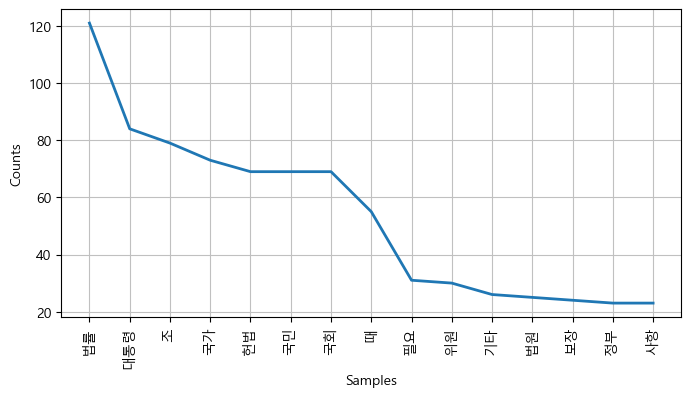

In [175]:
# 단아의 빈도수 시각화(nltk.Text)
import nltk
data_text = nltk.Text(noun_list)
plt.figure(figsize=(8,4))
plt.rc('font', family='Malgun Gothic')
data_text.plot(15)
plt.show()

In [177]:
data_text.vocab().most_common(15)

[('법률', 121),
 ('대통령', 84),
 ('조', 79),
 ('국가', 73),
 ('헌법', 69),
 ('국민', 69),
 ('국회', 69),
 ('때', 55),
 ('필요', 31),
 ('위원', 30),
 ('기타', 26),
 ('법원', 25),
 ('보장', 24),
 ('정부', 23),
 ('사항', 23)]

('법률', '대통령', '조', '국가', '헌법', '국민', '국회', '때', '필요', '위원', '기타', '법원', '보장', '정부', '사항')
(121, 84, 79, 73, 69, 69, 69, 55, 31, 30, 26, 25, 24, 23, 23)


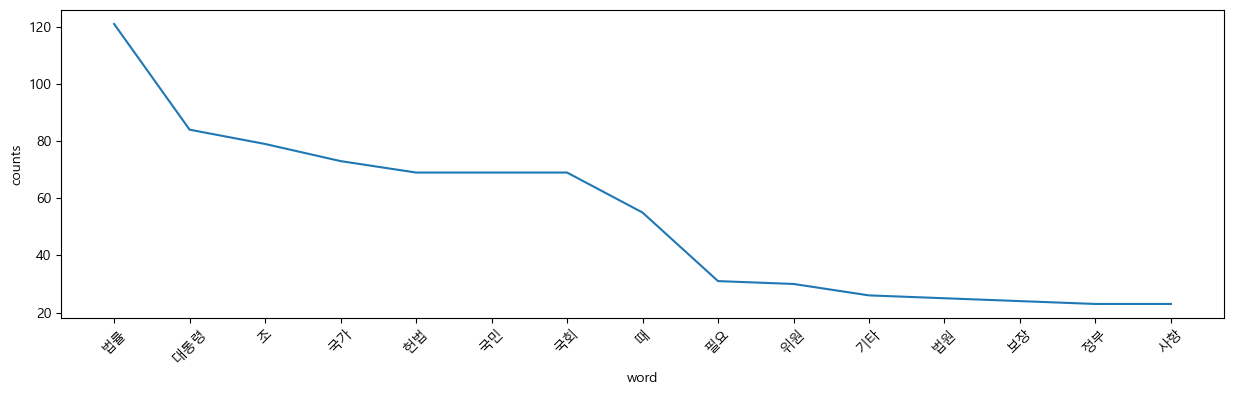

In [183]:
word, counts = zip(*data_text.vocab().most_common(15))
print(word)
print(counts)
plt.figure(figsize=(15,4))
plt.plot(word, counts)
plt.xticks(rotation=45)
plt.xlabel('word')
plt.ylabel('counts')
plt.show()

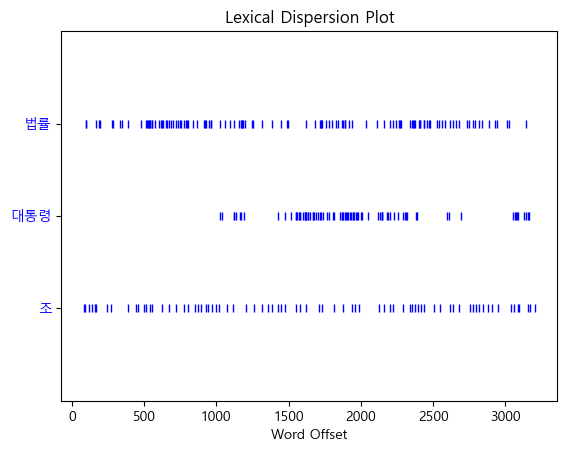

In [185]:
data_text.dispersion_plot(['법률','대통령','조'])

# 6. 워드 임베딩
- 단어간 벡터 계산 -> 단어간 유사성 도출

In [3]:
import requests
from bs4 import BeautifulSoup
rss_url = 'https://fs.jtbc.co.kr/RSS/economy.xml'
jtbc_response = requests.get(rss_url)
soup = BeautifulSoup(jtbc_response.content, 'xml')
link_el = soup.select('item link')
link_list = [el.text for el in link_el]
print(len(link_list), link_list)

20 ['https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220943', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220949', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220832', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220765', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220766', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220665', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220651', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220627', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220516', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220366', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220365', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220169', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220180', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12219888', 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12

In [4]:
'''
각 link들의 뉴스 기사 -> 명사만 : 
    [['등촌', '재건축', '명사1,...'],
    ['캠핑장','재건축',' 명사']...]
'''
from konlpy.tag import Kkma
kkma = Kkma()
news = []
for link in link_list:
    response = requests.get(link)
    # print(response.status_code)
    news_soup = BeautifulSoup(response.content, "html.parser")
    title = news_soup.select_one('title').text
    descrition = str(news_soup.select_one('meta[name="description"]'))
    noun_list = kkma.nouns(title + ' ' + descrition)
    불용어 = {'뉴스','앵커'}
    noun_list = [word for word in noun_list if word not in 불용어]
    #print(noun_list)
    news.append(noun_list)
print(news)

[['촌', '촌주공', '주공', '전', '홍수', '예상', '눈치', '눈치게임', '게임', '시작', '단군', '이래', '최대', '규모', '건축', '불리', '아파트', '입주', '다음', '말', '대규모', '전세', '전세매물', '매물', '현장'], ['실제', '완전', '사기', '캠핑', '캠핑장', '장', '관리', '소홀', '예약', '때', '플랫폼', '사진', '기대', '당황', '분'], ['요즘', '끼', '편의점', '정도', '정도일', '일', '줄', '2', '2만', '만', '원', '육박', '점심', '점심값', '값', '도시락', '때', '7000', '7000원', '식비', '부담'], ['오늘', '겠다', '말', '이유', '편의점', '도시락', '7', '7천원', '천', '원', '시대', '주머니', '직장인', '자취생', '눈앞', '아람', '기자'], ['경영권', '분쟁', '주', '표', '표대결', '대결', '로', '롤러', '롤러코스터', '코스터', '고려', '고려아연', '아연', '주가', '오늘', '28', '28일', '일', '장', '장중', '중', '15', '포인트', '말', '달', '이어진', '공개', '공개매수', '매수', '절차', '마무리', '뚜껑', '어보'], ['결혼', '돈', '걱정', '예비', '예비부부', '부부', '저출산', '문제지', '현실', '결혼식', '비용', '문제', '소식', '정', '정아람', '아람', '기자', '전', '전해드', '해드'], ['예비', '예비부부', '부부', '웨딩', '물가', '올해', '예식장', '비용', '21', '한편', '결혼식', '비싸져', '식', '소식', '정', '정아람', '아람', '기자', '내년', '5', '5월', '월', '결혼'], ['20', '20대', '대', '정규직', '비중', '역대', '최고',

In [6]:
# rss의 title과 description  => 명사 추출 => 워드임베딩(단어간 거리 계산) => 특정 단어의 유사도
import requests
from bs4 import BeautifulSoup
rss_url = 'https://fs.jtbc.co.kr/RSS/economy.xml'
jtbc_response = requests.get(rss_url)
soup = BeautifulSoup(jtbc_response.content, 'xml')
news = []
item_elems = soup.find_all('item')
for item_elem in item_elems:
    title = item_elem.find('title').text
    description = item_elem.find('description').text
    #print(title + ' ' + description)
    article = title + ' ' + description.replace('[앵커]',' ')
    noun_list = kkma.nouns(article)
    # 보통명사(NNG), 고유명사(NNP)
    noun_list = [word for word, tag in kkma.pos(article) if tag in ('NNG','NNP')]
    news.append(noun_list)
print(news[:3])

[['촌', '주공', '전', '홍수', '예상', '눈치', '게임', '시작', '단군', '이래', '최대', '규모', '건축', '불리', '촌', '주공', '아파트', '입주', '다음', '말', '시작', '대규모', '입주', '전세', '매물', '현장', '분위기', '이'], ['실제', '완전', '사기', '캠핑', '장', '관리', '소홀', '캠핑', '장', '예약', '때', '예약', '플랫폼', '사진', '실제', '불만', '경우', '앞', '예약', '플랫폼', '책임', '강화', '아람', '기자', '기자', '인터넷', '카페'], ['요즘', '끼', '편의점', '정도', '일', '줄', '육박', '점심', '값', '편의점', '도시락', '끼', '때', '편의점', '도시락', '식비', '부담', '아람', '기자', '기자', '서울', '한']]


In [7]:
# 워드 임베딩 (단어간 거리 계산)
# pip install gensim
from gensim.models import Word2Vec
model = Word2Vec(news,  # 학습데이터 2차원
                window=10,  # 각 단어의 좌우 10개 단어를 학습 컨텐츠로 사용
                min_count=2,  # 학습데이터에서 2회 이상 등장한 단어만 학습
                workers=-1,  # 병렬처리 코어 수. -1 : 모든 가용 코어 사용
                 
                )

In [16]:
model.wv.most_similar('성장률')

[('탓', 0.21533314883708954),
 ('내년', 0.1885775476694107),
 ('고려', 0.186837300658226),
 ('임금', 0.17437708377838135),
 ('상태', 0.1734192818403244),
 ('가격', 0.1675303876399994),
 ('아파트', 0.16677325963974),
 ('부부', 0.15028156340122223),
 ('여름', 0.12705811858177185),
 ('예상', 0.12119656056165695)]

In [12]:
model.wv.most_similar('아파트', topn=3)

[('아연', 0.2122785449028015),
 ('불리', 0.19188855588436127),
 ('매출', 0.16693152487277985)]